In [6]:
import sys
sys.path.append(sys.path[0] + "\\..\\scripts")
import importlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from 'C:\\Users\\Clarke\\Documents\\School Docs\\Third Year Homework\\DATA 301\\Data301-Project\\analysis\\submitted\\..\\scripts\\project_functions.py'>

In [35]:
sns.set_theme(style="ticks",font_scale=1.2)
df = pf.load_and_process("../../Dataset.csv")


---

### One of our main questions was asking which region or specific state has the worst theft?

We will start with a general overview of the data in terms of the broad regions outlines by the figure below provided by the FBI

![Image](../../images/regionsmapFBI.gif)

*Image taken from https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/area-definitions*

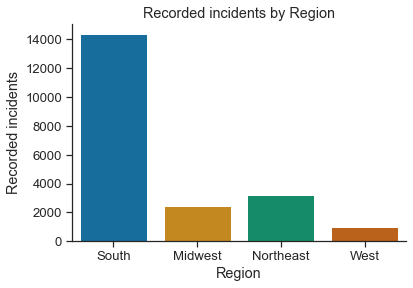

In [36]:
def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by Region")
    
theft_by_area(df)



**We see that by far the South region has the most occurances of crime**

If we compare percentage wise we see similar results:

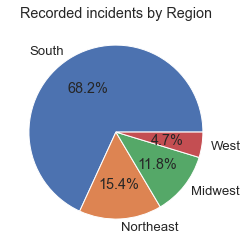

In [37]:
def theft_by_area_pie(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pie_graph=plt.pie(dataFrame["Region"].value_counts(),labels=dataFrame["Region"].value_counts().iloc[:4].index,autopct='%1.1f%%')
    plt.title("Recorded incidents by Region")
    
theft_by_area_pie(df)

Which gives us a similar result, early analysis is showing us that the South region has more crime than all the other regions combined!

### Lets take a deeper look into the South Region

In [38]:
df_south=df[df["Region"]=="South"]
states=df_south.State.unique()
for i in range(0,15):
    print("{}  ".format(states[i]))

Tennessee  
Virginia  
South Carolina  
Florida  
West Virginia  
Arkansas  
Delaware  
Mississippi  
Texas  
Oklahoma  
Maryland  
Georgia  
Kentucky  
Alabama  
North Carolina  


So these are the states that are included in the South Region that have reported crime statistics
#### Lets see which states in the South Region are particularily bad 

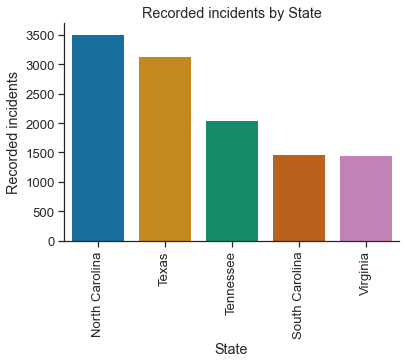

In [41]:
def theft_by_state(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="State",data=dataFrame,order=dataFrame["State"].value_counts().iloc[:5].index,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by State")
    plt.xticks(rotation=90)


theft_by_state(df_south)

### ***Lets see how these 5 shape up nation wide***


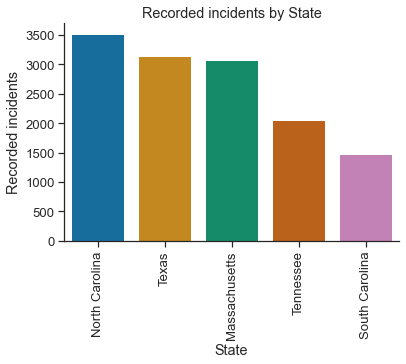

In [42]:
theft_by_state(df)

### So the South region contains 4 of the top 5 most reported incidents by state



**The one expection is Massachusetts which is found in the Northeast Region**

What if we consider the value of goods stolen by Region?

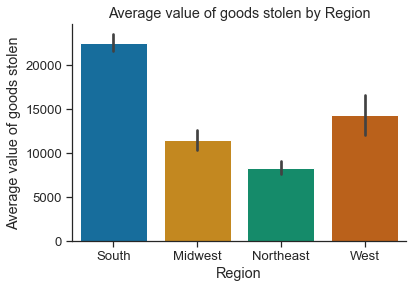

In [45]:
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen_Value",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Average value of goods stolen")
    plt.title("Average value of goods stolen by Region")
    
averages_values_stolen_by_area(df)

Again we see that the South region is be far the worst region for crime, this time with an average value of goods stolen almost double the rest of the regions excluding the West

  
#### This leads us to the conclusion that the South Region is the worst of the defined regions in terms of crime occurance and severity. In particular the states of North Carolina and Texas experience very high rates of reported incidents. 

---
## Another Question we had was what goods are the most frequently stolen?

Lets start by finding the 5 most commonly reported incidences by good type

In [47]:
top_5_stolen=df["Property_Type"].value_counts().iloc[:5].index
print("The top 5 most commonly stolen items are:\n")
for i in range(0,5):
    print("- {}\n".format(top_5_stolen[i]))

The top 5 most commonly stolen items are:

- Automobile

- Other

- Tools

- Money

- Trailers



### How many times were these top 5 items stolen?


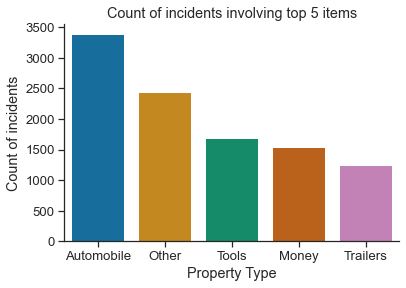

In [68]:
def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property_Type",data=dataframe,order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    plt.xlabel("Property Type")
    
top_5_stolen(df)


### Unfortuntaley we do not have any more information on the "Other" category so lets choose to ignore it

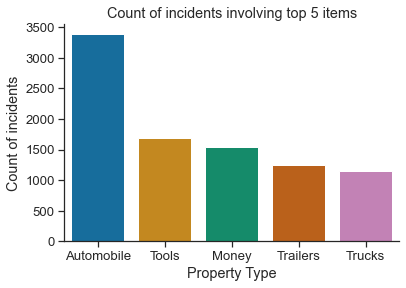

In [69]:
df_sub_other=df[df["Property_Type"]!="Other"]
top_5_stolen(df_sub_other)

On first glance we see that many of these categories involve or are related to vehicles and the automotive  
  
We also see that the Automobile category almost twice as large as the second largest Tools category

#### Lets now look at how these top 5 change by region

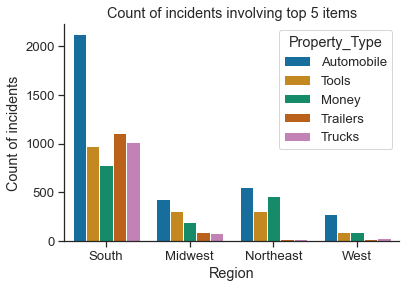

In [53]:
def top_5_stolen_by_region(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Region",hue="Property_Type",data=dataframe,hue_order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen_by_region(df_sub_other)

A few interesting trends are seen here:
>-Money theft appears to be more prevalent in the Northeast compared to other regions  
>-The South region is unique in that it's Money theft counts are the lowest of the top 5, with other states having this value be second or third  
>-Also in the South, Trailer and Truck theft are both second and third highest respectively, while in other Regions these are almost equally as common but rank fourth or fifth

#### With this analysis in mind, we can conclude that the Automobile category seems to uniformly be the most frequently reported theft. If we consider vehicles in general by also including Trailers and Trucks, our conclusion is that theft pertaining to the automotive industry is most frequently stolen.

---

These results lead us to start to think about what the likelyhood is that the good that were stolen end up being recovered either partially or fully. So we considered:

### *What is the average chance that stolen goods are recovered and what is the percentage of value recovered?*

With this in mind we started to do some analysis by region on the rates of recovery

In [57]:
df['Recovery_Percentage'] = df['Recovered_Value'] / df['Stolen_Value'] * 100

southDf = df.loc[df['Region'] == 'South']
northeastDf = df.loc[df['Region'] == 'Northeast']
midwestDf = df.loc[df['Region'] == 'Midwest']
westDf = df.loc[df['Region'] == 'West']

dfRecovered = df.loc[df['Recovered?'] == 'Y']
dfRecovered = dfRecovered.reset_index().drop(columns=['index'])

southDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'South']
northeastDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'Northeast']
midwestDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'Midwest']
westDfRecovered = dfRecovered.loc[dfRecovered['Region'] == 'West']

Recovery% South: 27.23%
Recovery% Northeast: 13.29%
Recovery% Midwest: 21.16%
Recovery% West: 29.54%
Recovery% Nationally: 24.48%


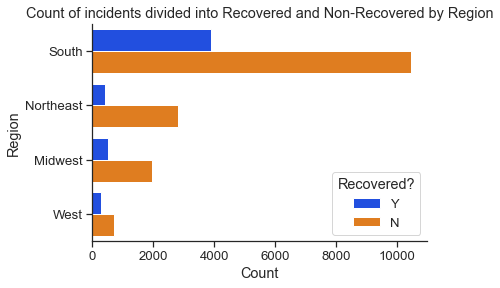

In [70]:
plot = sns.countplot(y="Region", data=df, hue="Recovered?", order=df['Region'].value_counts().index[:], hue_order=["Y", "N"], palette='bright')
sns.despine()
plt.title("Count of incidents divided into Recovered and Non-Recovered by Region")
plt.xlabel("Count")

southRecoverRate = southDf['Recovered?'].value_counts()
southRecoverRate = southRecoverRate['Y'] / (southDf['Recovered?'].count())

southRecoverRate = southDf['Recovered?'].value_counts()['Y'] / southDf['Recovered?'].count() * 100
northeastRecoverRate = northeastDf['Recovered?'].value_counts()['Y'] / northeastDf['Recovered?'].count() * 100
midwestRecoverRate = midwestDf['Recovered?'].value_counts()['Y'] / midwestDf['Recovered?'].count() * 100
westRecoverRate = westDf['Recovered?'].value_counts()['Y'] / westDf['Recovered?'].count() * 100

nationalRecoverRate = df['Recovered?'].value_counts()['Y']/df['Recovered?'].count()*100

print("Recovery% South: " + str(round(southRecoverRate, 2)) + "%")
print("Recovery% Northeast: " + str(round(northeastRecoverRate, 2)) + "%")
print("Recovery% Midwest: " + str(round(midwestRecoverRate, 2)) + "%")
print("Recovery% West: " + str(round(westRecoverRate, 2)) + "%")

print("Recovery% Nationally: " + str(round(nationalRecoverRate, 2)) + "%")

**We can see that the South and West regions are much better at recovering stolen goods. Also the Northeast region has a very low recovery rate, around half of the national average.**

With these recovery rates in mind, we set out to analyze the rate of return on goods that are recovered.

In [60]:
valueStolen = dfRecovered['Stolen_Value'].sum()
valueRecovered = dfRecovered['Recovered_Value'].sum()
recoveryRate = valueRecovered / valueStolen * 100

print("\nOn items that are recovered, the average value of the recovered stuff is " + str(round(recoveryRate, 2)) + "% of the value of the stolen goods.\n")


On items that are recovered, the average value of the recovered stuff is 82.99% of the value of the stolen goods.



Breaking this information down by region we see:

In [62]:
valueStolenSouth = southDfRecovered['Stolen_Value'].sum()
valueRecoveredSouth = southDfRecovered['Recovered_Value'].sum()
recoveryRateSouth = valueRecoveredSouth / valueStolenSouth * 100

valueStolenNortheast = northeastDfRecovered['Stolen_Value'].sum()
valueRecoveredNortheast = northeastDfRecovered['Recovered_Value'].sum()
recoveryRateNortheast = valueRecoveredNortheast / valueStolenNortheast * 100

valueStolenMidwest = midwestDfRecovered['Stolen_Value'].sum()
valueRecoveredMidwest = midwestDfRecovered['Recovered_Value'].sum()
recoveryRateMidwest = valueRecoveredMidwest / valueStolenMidwest * 100

valueStolenWest = westDfRecovered['Stolen_Value'].sum()
valueRecoveredWest = westDfRecovered['Recovered_Value'].sum()
recoveryRateWest = valueRecoveredWest / valueStolenWest * 100

print("On recovered items in the South region, the average value of the recovered stuff is " + str(round(recoveryRateSouth, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the Northeast region, the average value of the recovered stuff is " + str(round(recoveryRateNortheast, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the Midwest region, the average value of the recovered stuff is " + str(round(recoveryRateMidwest, 2)) + "% of the value of the stolen goods.")
print("On recovered items in the West region, the average value of the recovered stuff is " + str(round(recoveryRateWest, 2)) + "% of the value of the stolen goods.")

On recovered items in the South region, the average value of the recovered stuff is 81.88% of the value of the stolen goods.
On recovered items in the Northeast region, the average value of the recovered stuff is 82.71% of the value of the stolen goods.
On recovered items in the Midwest region, the average value of the recovered stuff is 94.13% of the value of the stolen goods.
On recovered items in the West region, the average value of the recovered stuff is 92.04% of the value of the stolen goods.


**So again we see the Northeast region performs poorly in this statistic. Here through, the South is also not as effective in returning all the goods compared to the West or the Midwest**

### Therefore, we conclude by evaluating the percentage of recovery and the amount of value recovered versus lost, that the Northeast region performs the poorest in recovering stolen goods. Also, we found that the national average recovery rate of 24.48% was suprisingly low based on our initial expectations
---

### What years were particularly bad for crime?

In [3]:
sns.set_theme(style="ticks",font_scale=1.2)
df = pf.load_and_process("../../Dataset.csv")
df

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,18-Jun-19
27084,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,25000.0,0.0,N,NaN
27089,2019,South Carolina,South Atlantic,SALUDA,South,"MSA counties from 10,000 thru 24,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Field/Woods,NaN,Automobile,4000.0,0.0,N,NaN
27070,2019,North Carolina,South Atlantic,ROBESON,South,"Non-MSA counties from 25,000 thru 99,999",False Pretenses/Swindle/Confidence Game,NaN,NaN,NaN,NaN,Individual,Bank/Savings and Loan,NaN,Money,2000.0,0.0,N,NaN


We can see that 2019 was a particularly bad year for the South and West regions,
while crime was much higher in the Northeast and Midwest regions in 2016.
It is also noteworthy that despite having the lowest incident rate overall, the West region is second highest in 2019.


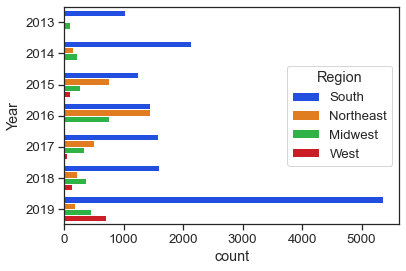

In [14]:
plot = sns.countplot(y="Year", data=df, hue="Region", hue_order=df['Region'].value_counts().index[:], palette='bright')
print("We can see that 2019 was a particularly bad year for the South and West regions,\nwhile crime was much higher in the Northeast and Midwest regions in 2016.")
print("It is also noteworthy that despite having the lowest incident rate overall, the West region is second highest in 2019.")

In [4]:
df2013 = df.loc[df['Year'] == 2013]
df2014 = df.loc[df['Year'] == 2014]
df2015 = df.loc[df['Year'] == 2015]
df2016 = df.loc[df['Year'] == 2016]
df2017 = df.loc[df['Year'] == 2017]
df2018 = df.loc[df['Year'] == 2018]
df2019 = df.loc[df['Year'] == 2019]

2013 has no data for the West region.


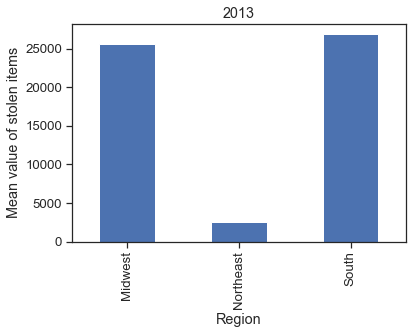

In [50]:
df2013.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2013')
print("2013 has no data for the West region.")

<AxesSubplot:title={'center':'2014'}, xlabel='Region', ylabel='Mean value of stolen items'>

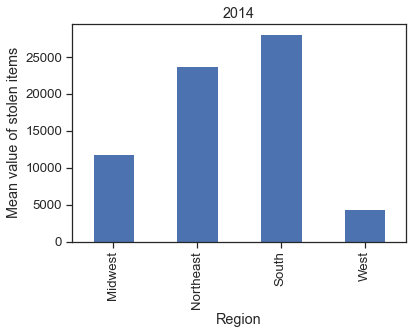

In [51]:
df2014.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2014')

<AxesSubplot:title={'center':'2015'}, xlabel='Region', ylabel='Mean value of stolen items'>

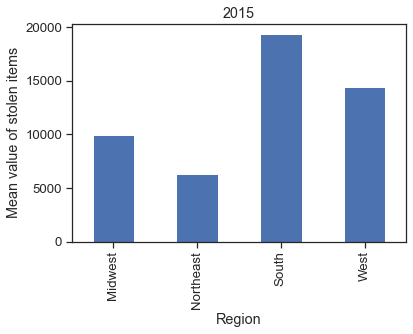

In [52]:
df2015.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2015')

<AxesSubplot:title={'center':'2016'}, xlabel='Region', ylabel='Mean value of stolen items'>

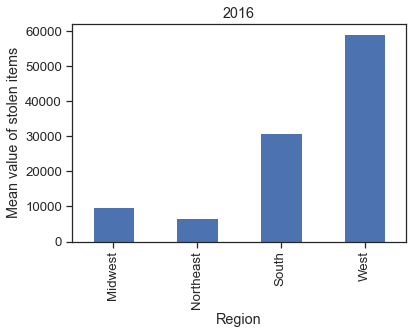

In [53]:
df2016.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2016')

<AxesSubplot:title={'center':'2017'}, xlabel='Region', ylabel='Mean value of stolen items'>

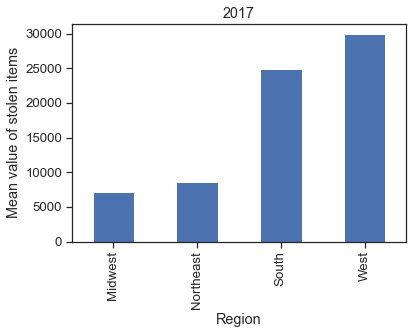

In [54]:
df2017.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2017')

<AxesSubplot:title={'center':'2018'}, xlabel='Region', ylabel='Mean value of stolen items'>

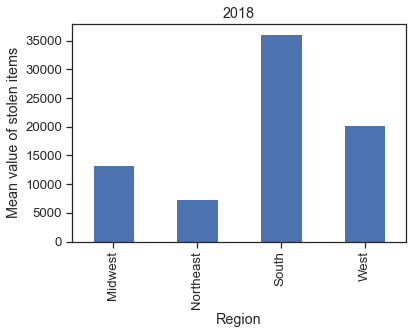

In [55]:
df2018.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2018')

<AxesSubplot:title={'center':'2019'}, xlabel='Region', ylabel='Mean value of stolen items'>

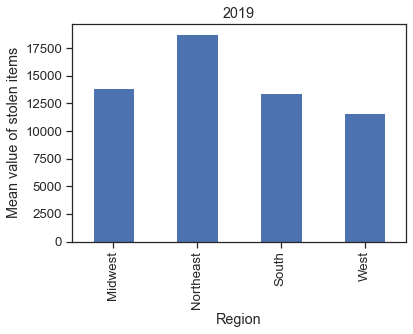

In [56]:
df2019.groupby('Region')['Stolen_Value'].mean().plot(kind='bar', ylabel='Mean value of stolen items', title='2019')

Analyzing the above plots, it is hard to say whether the up and down swings of average stolen value per region are actually meaningful.
There is a possibility that high mean values simply indicate that there were a few crimes commited that are outliers, skewing the value upwards.

### We can conclude that 2016 and 2019 were bad years, but for different regions. 2019 was especially bad for the South region, while 2016 was much worse than average for the Northeast region. On top of that, 2016 had very high average stolen values, particularly in the West.

---
# Group Member EDAs

## Clarke Larsen EDA

*Work done for Data 301 Group Project with group 1032*

In [1]:
import pandas as pd 
import numpy as np
import sys
import importlib
sys.path.append(sys.path[0] + "\..\scripts")
import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from 'C:\\Users\\Clarke\\Documents\\School Docs\\Third Year Homework\\DATA 301\\Data301-Project\\analysis\\Clarke\\..\\scripts\\project_functions.py'>

In [2]:
df= pf.load_and_process("../../Dataset.csv")
df

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,18-Jun-19
27084,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,25000.0,0.0,N,NaN
27089,2019,South Carolina,South Atlantic,SALUDA,South,"MSA counties from 10,000 thru 24,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Field/Woods,NaN,Automobile,4000.0,0.0,N,NaN
27070,2019,North Carolina,South Atlantic,ROBESON,South,"Non-MSA counties from 25,000 thru 99,999",False Pretenses/Swindle/Confidence Game,NaN,NaN,NaN,NaN,Individual,Bank/Savings and Loan,NaN,Money,2000.0,0.0,N,NaN


---
## Lets take a look at the regions given in the dataframe and compare them

The regions in our data set can be seen to cover the following area

![Image](../../images/regionsmapFBI.gif)

*Image taken from https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/area-definitions*

### One of our main questions we had was asking which region or specific state has the worst theft?

We will start with a general overview of the data in terms of the broad regions outlines by the figure above provided by the FBI

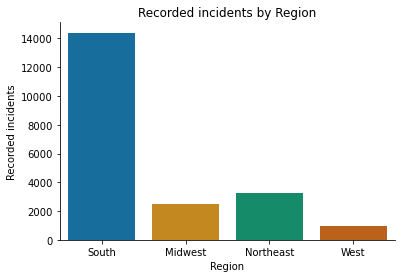

In [10]:
def theft_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="Region",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by Region")
    
theft_by_area(df)



We see that by far the South region has the most occurances of crime

If we compare percentage wise we see similar results:

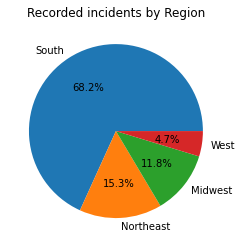

In [12]:
def theft_by_area_pie(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    pie_graph=plt.pie(dataFrame["Region"].value_counts(),labels=dataFrame["Region"].value_counts().iloc[:4].index,autopct='%1.1f%%')
    plt.title("Recorded incidents by Region")
    
theft_by_area_pie(df)

Which gives us a similar result, early analysis is showing us that the South region has more crime than all the other regions combined!

### Lets take a deeper look into the South Region

In [58]:
df_south=df[df["Region"]=="South"]
states=df_south.State.unique()
states

array(['Tennessee', 'Virginia', 'South Carolina', 'Florida',
       'West Virginia', 'Arkansas', 'Delaware', 'Mississippi', 'Texas',
       'Oklahoma', 'Maryland', 'Georgia', 'Kentucky', 'Alabama',
       'North Carolina'], dtype=object)

So these are the states that are included in the South Region, lets see which states are worst for theft

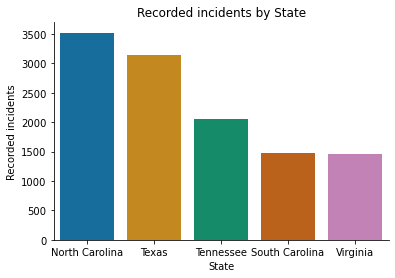

In [29]:
def theft_by_state(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    theft=sns.countplot(x="State",data=dataFrame,order=dataFrame["State"].value_counts().iloc[:5].index,palette='colorblind')
    sns.despine()
    plt.ylabel("Recorded incidents")
    plt.title("Recorded incidents by State")


theft_by_state(df_south)




***Lets see how these 5 shape up nation wide***


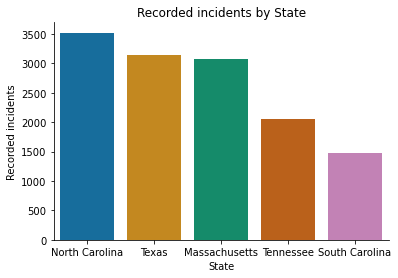

In [31]:
theft_by_state(df)

### So the South region contains 4 of the top 5 most reported incidents by state



**The one expection is Massachusetts which is found in the Northeast Region**

What if we consider the value of goods stolen by Region?

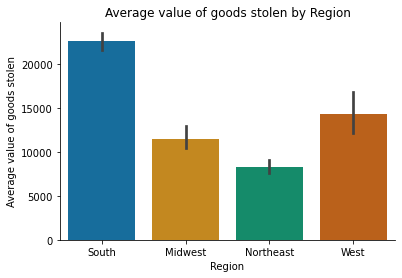

In [34]:
def averages_values_stolen_by_area(dataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    aerage_value=sns.barplot(x="Region",y="Stolen_Value",data=dataFrame,palette='colorblind')
    sns.despine()
    plt.ylabel("Average value of goods stolen")
    plt.title("Average value of goods stolen by Region")
    
averages_values_stolen_by_area(df)

Again we see that the South region is be far the worst region for crime, this time with an average value of goods stolen almost double the rest of the regions excluding the West

  
#### This leads us to the conclusion that the South Region is the worst of the defined regions in terms of crime occurance and severity. In particular the states of North Carolina and Texas experience very high rates of reported incidents. 

---
## Another Question we had was what goods are the most frequently stolen?

Lets start by finding the 5 most commonly reported incidences by good type

In [46]:
top_5_stolen=df["Property_Type"].value_counts().iloc[:5].index
print("The top 5 most commonly stolen items are:\n")
for i in range(0,5):
    print("- {}\n".format(top_5_stolen[i]))

The top 5 most commonly stolen items are:

- Automobile

- Other

- Tools

- Money

- Trailers



  
#### How many times were these top 5 items stolen?
  

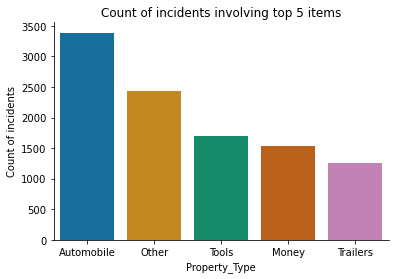

In [55]:
def top_5_stolen(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Property_Type",data=dataframe,order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen(df)


**Unfortuntaley we do not have any more information on the "Other" category so lets choose to ignore it**

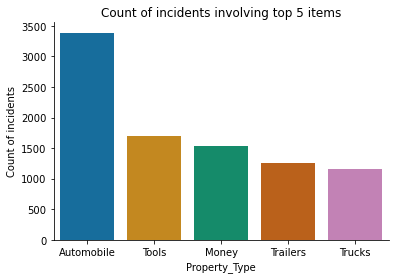

In [56]:
df_sub_other=df[df["Property_Type"]!="Other"]
top_5_stolen(df_sub_other)

On first glance we see that many of these categories involve or relate to vehicles  
  
We also see that the Automobile category almost twice as large as the second largest Tools category

#### Lets now look at how these top 5 change by region

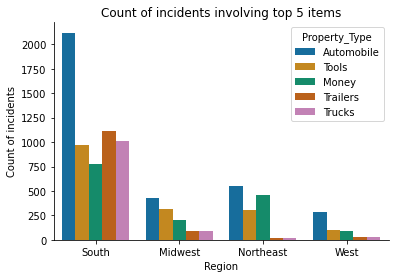

In [60]:
def top_5_stolen_by_region(dataframe):
    import matplotlib.pyplot as plt
    import seaborn as sns
    top_5_stolen=dataframe["Property_Type"].value_counts().iloc[:5].index
    top_5=sns.countplot(x="Region",hue="Property_Type",data=dataframe,hue_order=top_5_stolen,palette='colorblind')
    sns.despine()
    plt.ylabel("Count of incidents")
    plt.title("Count of incidents involving top 5 items")
    
top_5_stolen_by_region(df_sub_other)

A few interesting trends are seen here:
>-Money theft appears to be more prevalent in the Northeast compared to other regions  
>-The South region is unique in that it's Money theft counts are the lowest of the top 5, with other states having this value be second or third  
>-Also in the South, Trailer and Truck theft are both second and third highest respectively, while in other Regions these are almost equally as common but rank fourth or fifth

#### With this analysis in mind, we can conclude that the Automobile category seems to uniformly be the most frequently reported theft. If we consider vehicles in general by also including Trailers and Trucks, our conclusion is that theft pertaining to the automotive industry is most frequently stolen.
  
---

## Zach Prenovost EDA


First off we are going to import our method chaining function to get our reduced, usuable data set:

In [45]:
import matplotlib.pylab as plt
import seaborn as sns
import pandas as pd
import numpy as np
import sys
import importlib

# remove comment below and add comment 2 lines below if on windows
# sys.path.append(sys.path[0] + "\\..\\scripts")
sys.path.append(sys.path[0] + "/../scripts")

import project_functions as pf
importlib.reload(pf)

<module 'project_functions' from '/Users/zachprenovost/School/data301/FinalProject/Data301-Project/analysis/Zach/../scripts/project_functions.py'>

In [46]:
df = pf.load_and_process("../../Dataset.csv")

**So we've got our data. what now?**
lets start by looking at some of the attributes of our dataset.

In [47]:
print('shape: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))

shape: (21069, 19)
Columns: Index(['Year', 'State', 'Division', 'County', 'Region',
       'Population_Description', 'Offense', 'Offender_Race',
       'Offender_Ethnicity', 'Offender_Age', 'Offender_Sex', 'Victim_Type',
       'Location', 'Weapon', 'Property_Type', 'Stolen_Value',
       'Recovered_Value', 'Recovered?', 'Recovery_Date'],
      dtype='object')


The `df.shape` function gives us the dimensions of our dataset. after using it we can see that there are 21,111 rows and 19 columns. 

the `df.columns` function gives us the names of all the columns included in the data set. 

Now lets look at what this dataset looks like: df.head will give us a look at the first five entries.

In [36]:
df.head()

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN


# Next we want to gain an understanding of some of the different variables in the dataset

`df.nunique` will return the count of unique values associated with each collumn, already from this we can determine a number of things about our data set

In [37]:
df.nunique(axis=0)

Year                         7
State                       40
Division                     9
County                     674
Region                       4
Population_Description      17
Offense                     33
Offender_Race                6
Offender_Ethnicity           3
Offender_Age                73
Offender_Sex                 3
Victim_Type                  9
Location                    44
Weapon                      12
Property_Type               62
Stolen_Value              2698
Recovered_Value            457
Recovered?                   2
Recovery_Date             1235
dtype: int64

**from this we can gather:**
* we have data entries from 7 unique years 
* 40 different states
* there were over 33 different offenses listed 
* and over 12 different options for type of weapon used

We can come back to this later when trying to answer our reasearch questions. it will be useful.

Next lets use `.describe()` to look at the count, mean, standard deviation, min, and max for the numeric variables in our data set.

In [38]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,Year,Offender_Age,Stolen_Value,Recovered_Value
count,21069.000000,8441.000000,21069.000000,20270.000000
mean,2016.780151,32.567231,18700.586786,6299.519339
std,1.966321,12.762746,51723.972002,30105.870148
min,2013.000000,0.000000,1001.000000,0.000000
25%,2015.000000,23.000000,2000.000000,0.000000
50%,2017.000000,31.000000,4500.000000,0.000000
75%,2019.000000,41.000000,15000.000000,1.000000
max,2019.000000,99.000000,999999.000000,800000.000000


Awesome! by using `df.describe` we gathered that the average value stolen was 39,663.86, the most stolen was 250,000,000 dollars. sheesh thats a lot. we also learned other things, like the average age of the offenders in our database

**now im going to look at some of the unique entries we talked about earlier, lets look at the crimes in particular!**

In [39]:
df.Offense.unique()

array(['Theft From Motor Vehicle', 'All Other Larceny', 'Embezzlement',
       'Weapon Law Violations', 'Motor Vehicle Theft',
       'False Pretenses/Swindle/Confidence Game',
       'Destruction/Damage/Vandalism of Property',
       'Burglary/Breaking & Entering',
       'Credit Card/Automated Teller Machine Fraud',
       'Theft of Motor Vehicle Parts or Accessories',
       'Theft From Building', 'Robbery', 'Rape',
       'Drug/Narcotic Violations', 'Impersonation',
       'Kidnapping/Abduction', 'Simple Assault',
       'Stolen Property Offenses', 'Wire Fraud', 'Counterfeiting/Forgery',
       'Murder and Nonnegligent Manslaughter', 'Shoplifting',
       'Intimidation', 'Extortion/Blackmail', 'Arson',
       'Drug Equipment Violations', 'Identity Theft',
       'Aggravated Assault', 'Sexual Assault With An Object',
       'Pocket-picking', 'Purse-snatching',
       'Pornography/Obscene Material',
       'Human Trafficking, Involuntary Servitude'], dtype=object)

we can use this function to look at all of our columns unique entries, lets look at weapons next. 

In [40]:
df.Weapon.unique()

array([nan, 'Firearm (Automatic)', 'Handgun', 'Handgun (Automatic)',
       'Firearm', 'None', 'Unknown', 'Rifle', 'Personal Weapons',
       'Blunt Object', 'Knife/Cutting Instrument', 'Other',
       'Motor Vehicle/Vessel'], dtype=object)

lets do this some more

In [41]:
print(df.State.unique())

print(df.Population_Description.unique())


['Tennessee' 'Virginia' 'Michigan' 'South Carolina' 'Florida'
 'West Virginia' 'Arkansas' 'Delaware' 'Mississippi' 'North Dakota'
 'Massachusetts' 'Texas' 'New Hampshire' 'Colorado' 'Oklahoma' 'Indiana'
 'Montana' 'Vermont' 'Maine' 'South Dakota' 'Ohio' 'Maryland'
 'Rhode Island' 'Georgia' 'Oregon' 'Nevada' 'Alaska' 'Kentucky'
 'Minnesota' 'New Mexico' 'New Jersey' 'Utah' 'Arizona' 'Washington'
 'Alabama' 'Idaho' 'North Carolina' 'Missouri' 'Nebraska' 'Hawaii']
['Cities from 25,000 thru 49,999'
 'Non-MSA counties from 25,000 thru 99,999'
 'Cities from 50,000 thru 99,999' 'MSA counties 100,000 or over'
 'MSA counties from 25,000 thru 99,999' 'Cities from 500,000 thru 999,999'
 'Cities from 2,500 thru 9,999' 'Cities from 10,000 thru 24,999'
 'Cities from 100,000 thru 249,999' 'MSA counties from 10,000 thru 24,999'
 'MSA counties under 10,000' 'Non-MSA counties from 10,000 thru 24,999'
 'Cities under 2,500' 'Non-MSA counties under 10,000'
 'Cities from 250,000 thru 499,999' 'Cities 1,000,

Next i am going to create some visuals to help us understand our data . 

the first plot i am going to create is a scatter plot. This will help us visualize where data points fall relative to each other. 

<AxesSubplot:xlabel='Year', ylabel='Stolen_Value'>

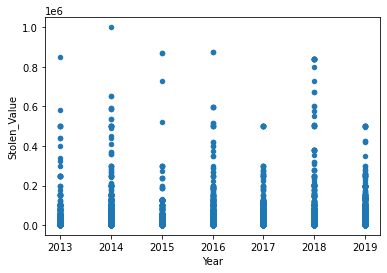

In [42]:
df.plot(kind = 'scatter', x = 'Year', y = 'Stolen_Value' )

after looking at the plot we can determine 2 things:
1. the vast majority of our data is clustered together. 
2. there are some outliers amongst the data.

lets get rid of those outliers so we have a more useful plot

<AxesSubplot:xlabel='Year', ylabel='Stolen_Value'>

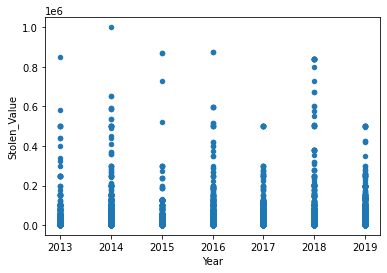

In [43]:
df2= df[df['Stolen_Value']<1000000]
df2.plot(kind = 'scatter', x = 'Year', y = 'Stolen_Value' )

now that we have set parameters on our data, speicifically capping the stolen value at 1,000,000 we can see the distribution across the 7 years much more clearly.

now we can look at where the most crime is occuring: here is a bar graph of crime by region:

<AxesSubplot:xlabel='Region', ylabel='count'>

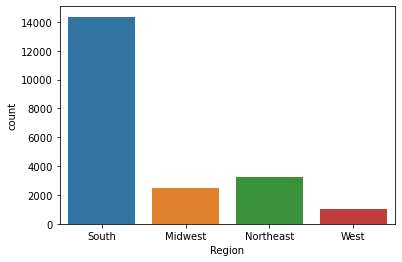

In [44]:
sns.countplot( data = df, x ='Region' )

from this graph we can determine the vast majority of crime is occuring in the south region of the united states. 

---

## Cole Van Steinburg EDA

*Work done for Data 301 Group Project with group 1032*

In [18]:
import sys
sys.path.append(sys.path[0] + "\..\scripts")
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import project_functions as pf
import importlib
importlib.reload(pf)

sns.set_theme(style="ticks",font_scale=1)
df = pf.load_and_process("../../Dataset.csv")
df['Recovery_Percentage'] = df['Recovered_Value'] / df['Stolen_Value'] * 100

In [19]:
df= pf.load_and_process("../../Dataset.csv")
df

,Year,State,Division,County,Region,Population_Description,Offense,Offender_Race,Offender_Ethnicity,Offender_Age,Offender_Sex,Victim_Type,Location,Weapon,Property_Type,Stolen_Value,Recovered_Value,Recovered?,Recovery_Date
87433,2013,Tennessee,East South Central,PUTNAM,South,"Cities from 25,000 thru 49,999",Theft From Motor Vehicle,NaN,NaN,NaN,NaN,Business,Parking/Drop Lot/Garage,NaN,Clothes/ Furs,1765.0,0.0,N,NaN
82563,2013,Virginia,South Atlantic,HENRY,South,"Non-MSA counties from 25,000 thru 99,999",All Other Larceny,White,NaN,25.0,M,Individual,Service/Gas Station,NaN,Trailers,17500.0,17500.0,Y,03-Apr-13
28695,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,30.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
28696,2013,Michigan,East North Central,WAYNE,Midwest,"Cities from 50,000 thru 99,999",Embezzlement,White,NaN,31.0,M,Business,Highway/Road/Alley/Street/Sidewalk,Firearm (Automatic),Money,49000.0,49000.0,Y,27-Jul-13
60314,2013,South Carolina,South Atlantic,HORRY,South,"MSA counties 100,000 or over",All Other Larceny,NaN,NaN,NaN,NaN,Business,Specialty Store,NaN,Other,6500.0,0.0,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27083,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,15000.0,10000.0,Y,18-Jun-19
27084,2019,South Carolina,South Atlantic,DORCHESTER; CHARLESTON,South,"Cities from 100,000 thru 249,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Residence/Home,NaN,Automobile,25000.0,0.0,N,NaN
27089,2019,South Carolina,South Atlantic,SALUDA,South,"MSA counties from 10,000 thru 24,999",Motor Vehicle Theft,NaN,NaN,NaN,NaN,Individual,Field/Woods,NaN,Automobile,4000.0,0.0,N,NaN
27070,2019,North Carolina,South Atlantic,ROBESON,South,"Non-MSA counties from 25,000 thru 99,999",False Pretenses/Swindle/Confidence Game,NaN,NaN,NaN,NaN,Individual,Bank/Savings and Loan,NaN,Money,2000.0,0.0,N,NaN


---
#### Let's see how the top 5 state compares for number of things stolen, then by average value stolen.

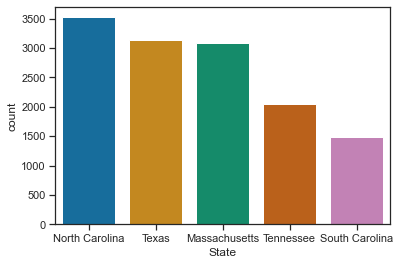

In [3]:
plot=sns.countplot(x="State",data=df,palette='colorblind',order=df['State'].value_counts().index[:5])

#### Now let's see which states are the worst in each region.

In [4]:
df_south = df.loc[df['Region']=='South']
df_west = df.loc[df['Region']=='West']
df_northeast = df.loc[df['Region']=='Northeast']
df_midwest = df.loc[df['Region']=='Midwest']

South


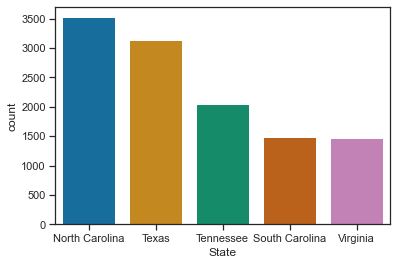

In [5]:
plot=sns.countplot(x="State",data=df_south,palette='colorblind',order=df_south['State'].value_counts().index[:5])
print("South")

West


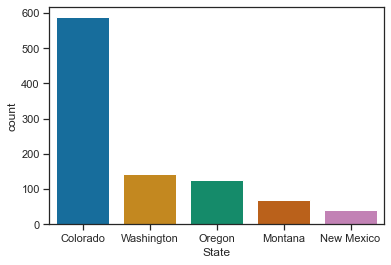

In [6]:
plot=sns.countplot(x="State",data=df_west,palette='colorblind',order=df_west['State'].value_counts().index[:5])
print("West")

Northeast


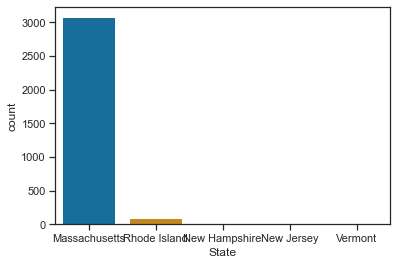

In [7]:
plot=sns.countplot(x="State",data=df_northeast,palette='colorblind',order=df_northeast['State'].value_counts().index[:5])
print("Northeast")

Midwest


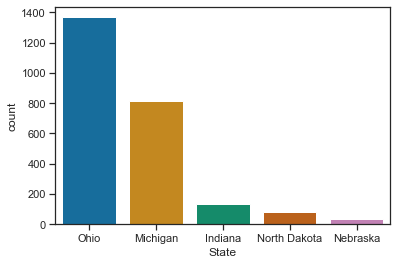

In [8]:
plot=sns.countplot(x="State",data=df_midwest,palette='colorblind',order=df_midwest['State'].value_counts().index[:5])
print("Midwest")

Some observations, North Carolina has more items stolen than the entirety of any other single region.

Most of the top states overall also happen to be in the South region.

---

#### Now let's see what items are stolen the most

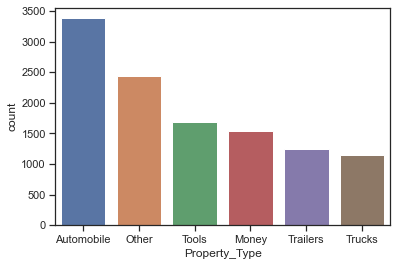

In [9]:
plot=sns.countplot(data=df, x="Property_Type", order=df['Property_Type'].value_counts().index[:6])

We can see that Automobile theft is by far the most common.
##### Let's look by region

South


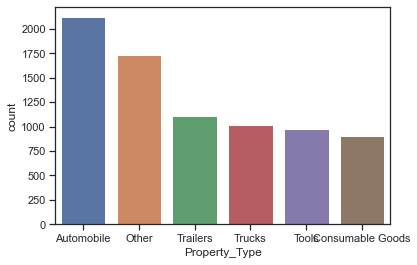

In [10]:
plot=sns.countplot(data=df_south, x="Property_Type", order=df_south['Property_Type'].value_counts().index[:6])
print("South")

West


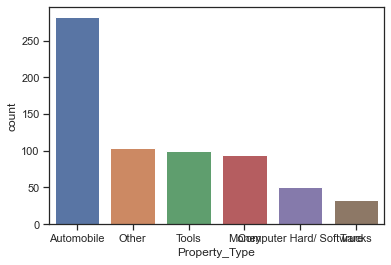

In [11]:
plot=sns.countplot(data=df_west, x="Property_Type", order=df_west['Property_Type'].value_counts().index[:6])
print("West")

Northeast


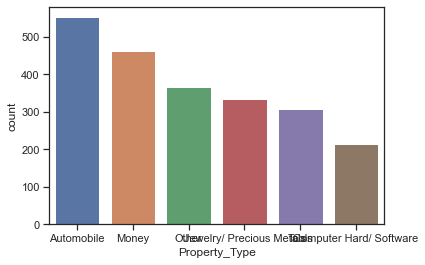

In [12]:
plot=sns.countplot(data=df_northeast, x="Property_Type", order=df_northeast['Property_Type'].value_counts().index[:6])
print("Northeast")

Midwest


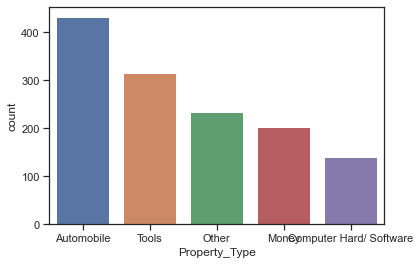

In [13]:
plot=sns.countplot(data=df_midwest, x="Property_Type", order=df_midwest['Property_Type'].value_counts().index[:5])
print("Midwest")

We can see that automobile theft is the most common in every region, but tools are more commonly stolen in the Midwest compared to other regions, while money is stolen more than other regions in the Northeast.

---

#### Let's see which region has the highest average value stolen.

<AxesSubplot:xlabel='Region'>

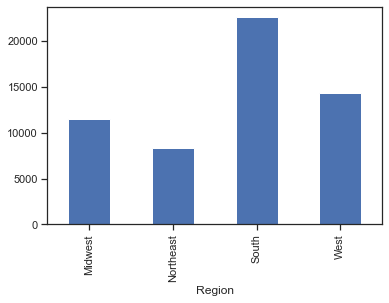

In [14]:
df.groupby('Region')['Stolen_Value'].mean().plot(kind="bar")

When items are stolen, the average value in the South is more than double the average stolen value in the Northeast.

Let's look at how much crime happens per year per region.

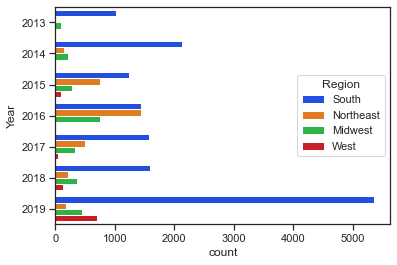

In [15]:
plot = sns.countplot(y="Year", data=df, hue="Region", hue_order=df['Region'].value_counts().index[:], palette='bright')

Interestingly, 2019 may be skewing the mean results for the South region. For some reason their reported items stolen has more than doubled since previous years.

Also interesting is that the Northeast was slightly worse than the South in 2016, whereas they are usually drastically better, and one of the lower crime areas in general for theft.

---

#### What about population? How does it affect the rate of items being stolen?

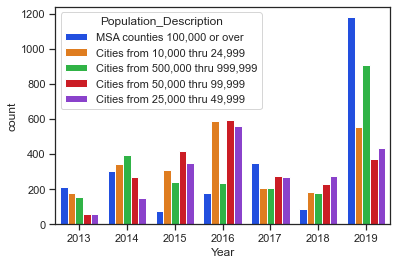

In [16]:
plot = sns.countplot(x="Year", data=df, hue="Population_Description", hue_order=df['Population_Description'].value_counts().index[:5], palette='bright')

In 2019 the numbers are as expected, where high population is correlated with higher rate of items stolen.

Interestingly, in prior years, the higher crime rate often came from cities with very low populations. I wonder if lower population is correlated with the South region.

---

#### Let's find out what population sizes cause the most crime by region

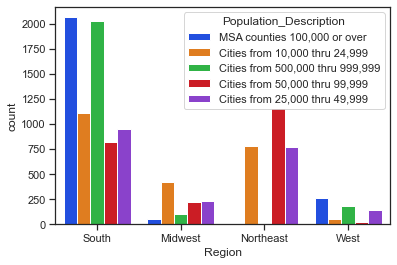

In [17]:
plot = sns.countplot(x="Region", data=df, hue="Population_Description", hue_order=df['Population_Description'].value_counts().index[:5], palette='bright')

While high population is correlated with more items stolen in the South and Northeast, other regions are more averaged out. It is expected that higher population should have more crime, but what is interesting in the South is that in the 10,000-24,999 range they have half the reported crime as they do in places with 100,000+ population and cities with 500,000-999,999.

This means that the south has a higher crime rate per capita in areas with lower population by a significant amount (at least 4x).